# 05_回帰2：時系列予測

## 2. データの準備

**事前にdartsのインストールをしておく。**

In [1]:
# データのロード
from darts.datasets import AirPassengersDataset
series = AirPassengersDataset().load()

CSVファイルから読み込む場合

In [5]:
# CSVファイルの読み込み
import pandas as pd
df = pd.read_csv('AirPassengers.csv')

# 時系列を指定してSeriesを作る
from darts.timeseries import TimeSeries
series = TimeSeries.from_dataframe(df, time_col='Month', value_cols=['#Passengers'])

<Axes: xlabel='Month'>

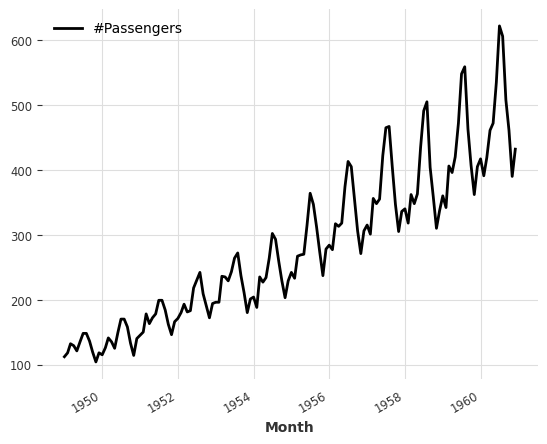

In [7]:
# グラフの描画
# Jupyter Labの場合
series.plot()

訓練用とテスト用に分割、表示

<Axes: xlabel='Month'>

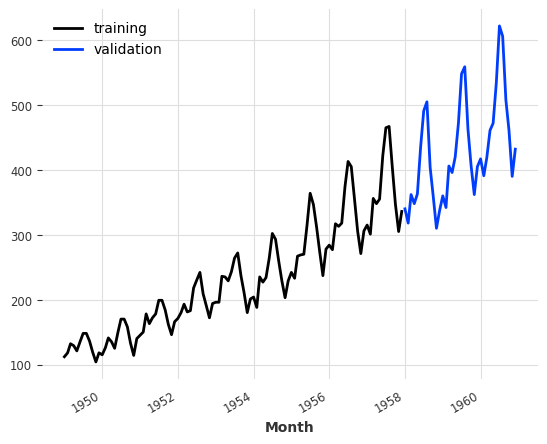

In [9]:
# 訓練用とテスト用に分割、表示
train, val = series[:-36], series[-36:]
train.plot(label="training")
val.plot(label="validation")
#plt.show() #.pyの場合

## 3. モデルの構築

### 3-1 ベースラインモデル：NaiveSeasonal

In [12]:
# モデルを使用するためにインポート
from darts.models import NaiveSeasonal

In [30]:
# モデルの作成（Kをいくつか変えて実行）
model_NS = NaiveSeasonal(K=12)

In [32]:
# fitに学習用データを入れて学習
model_NS.fit(train)

NaiveSeasonal(K=12)

### 3-2. 統計的なモデル：ExponentialSmoothing

In [38]:
# モデルを使用するためにインポート
from darts.models import ExponentialSmoothing

In [40]:
# モデルの作成（random_state=学籍番号）
model_Exp = ExponentialSmoothing(random_state=2230033)

# fitに学習用データを入れて学習
model_Exp.fit(train)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=2230033, kwargs=None)

### 3-3. 機械学習を用いたモデル：LinearRegression

In [46]:
# モデルを使用するためにインポート
from darts.models import LinearRegressionModel

In [48]:
# モデルの作成（random_state=学籍番号）
model_LR = LinearRegressionModel(random_state=2230033, lags=12)

# fitに学習用データを入れて学習
model_LR.fit(train)

LinearRegressionModel(lags=12, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=1, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=2230033, multi_models=True, use_static_covariates=True)

## 4. 性能評価

### 4-1. 予測値の計算と確認

In [66]:
# 予測
pred_NS = model_NS.predict(36)
pred_Exp = model_Exp.predict(36)#自分で
pred_LR = model_LR.predict(36)#自分で

<Axes: xlabel='Month'>

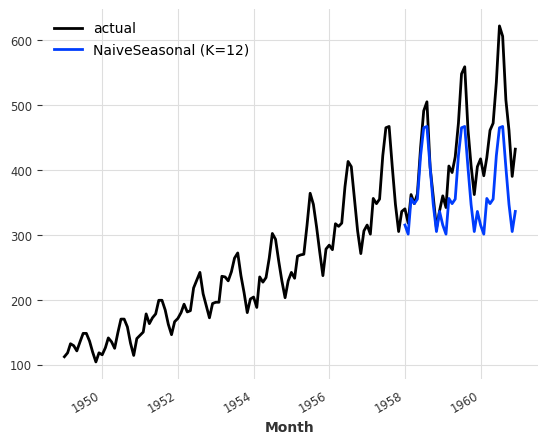

In [36]:
# NaiveSeasonalのグラフ
series.plot(label="actual")
pred_NS.plot(label="NaiveSeasonal (K=12)")

<Axes: xlabel='Month'>

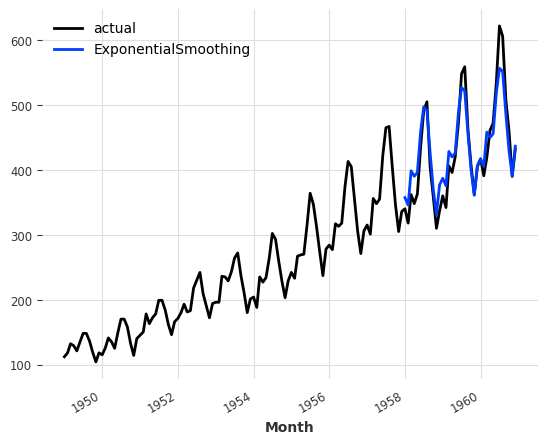

In [44]:
# ExponentialSmoothingのグラフ
series.plot(label="actual")
pred_Exp.plot(label="ExponentialSmoothing")

<Axes: xlabel='Month'>

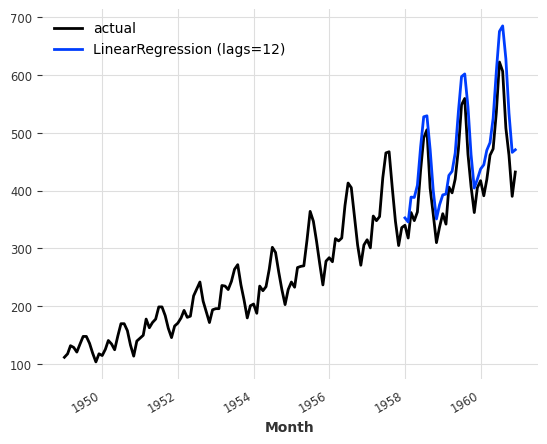

In [68]:
# LinearRegressionのグラフ
series.plot(label="actual")
pred_LR.plot(label="LinearRegression (lags=12)")

### 4-2. 性能評価

In [62]:
# 決定係数（r2-score）
from darts.metrics import r2_score
print("---r2_score---")
print("NaiveSeasonal",r2_score(val, pred_NS))
# 残り2つは自分で
print("ExponentialSmoothing",r2_score(val, pred_Exp))
print("LinearRegression", r2_score(val, pred_LR))

---r2_score---
NaiveSeasonal 0.11433812012221978
ExponentialSmoothing 0.88629586749554
LinearRegression 0.5653676895001656


In [70]:
# MAPE
from darts.metrics import mape
#自分でやってみよう
print("---mape---")
print("NaiveSeasonal",mape(val, pred_NS))
print("ExponentialSmoothing",mape(val, pred_Exp))
print("LinearRegression", mape(val, pred_LR))

---mape---
NaiveSeasonal 13.189432350948401
ExponentialSmoothing 5.1141760431748535
LinearRegression 10.913989054789512
